In [123]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline

First, we need to do some exploration of the data.

In [124]:
data = pd.read_csv('C:\\Users\\jjc16\\OneDrive\\Documents\\hw_analysis.csv')

data.head()

,Outcome,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,0.545056,35.037628,0.230787,0.058844,0.608215,0.518981,2,B,0.447716,B
1,1,0.690431,52.127513,0.380081,0.807817,0.659736,0.599163,2,B,0.605853,B
2,0,0.518941,22.160225,0.322625,0.291814,0.476274,0.188656,2,A,0.370272,A
3,1,0.320823,75.839760,0.001076,0.116437,0.276383,0.626285,2,C,0.539610,B
4,1,0.936696,0.590052,0.966559,0.936493,0.943665,0.058094,3,A,0.471298,B


It looks like the data contains a column of interest (Outcome) and ten columns on which the data might depend. Just from looking at the data, both in Jupyter and in Excel, I already suspect that X10 is just Outcome transformed into the letters A and B. 

In [125]:
data.X10=[ord(x)-64 for x in data.X10]


In [126]:
data.head()


,Outcome,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
0,1,0.545056,35.037628,0.230787,0.058844,0.608215,0.518981,2,B,0.447716,2
1,1,0.690431,52.127513,0.380081,0.807817,0.659736,0.599163,2,B,0.605853,2
2,0,0.518941,22.160225,0.322625,0.291814,0.476274,0.188656,2,A,0.370272,1
3,1,0.320823,75.839760,0.001076,0.116437,0.276383,0.626285,2,C,0.539610,2
4,1,0.936696,0.590052,0.966559,0.936493,0.943665,0.058094,3,A,0.471298,2


array([[ 1.,  1.],
       [ 1.,  1.]])

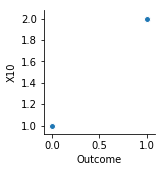

In [127]:
sns.pairplot(data=data, x_vars=['Outcome'],y_vars=['X10'])
np.corrcoef(data.Outcome,data.X10)

In [128]:
corr=data.corr()
corr

,Outcome,X1,X2,X3,X4,X5,X6,X7,X9,X10
Outcome,1.000000,0.114671,-0.013183,0.000242,0.001491,0.139766,-0.013163,0.177861,0.090776,1.000000
X1,0.114671,1.000000,-0.010957,-0.015919,0.006783,0.833179,-0.011644,0.805725,0.604026,0.114671
X2,-0.013183,-0.010957,1.000000,0.002947,-0.004758,-0.012410,0.920410,-0.015367,0.701885,-0.013183
X3,0.000242,-0.015919,0.002947,1.000000,-0.000823,-0.014654,-0.000835,-0.010274,-0.008349,0.000242
X4,0.001491,0.006783,-0.004758,-0.000823,1.000000,0.003219,-0.006678,0.004866,0.000596,0.001491
X5,0.139766,0.833179,-0.012410,-0.014654,0.003219,1.000000,-0.014814,0.911056,0.682829,0.139766
X6,-0.013163,-0.011644,0.920410,-0.000835,-0.006678,-0.014814,1.000000,-0.022034,0.643229,-0.013163
X7,0.177861,0.805725,-0.015367,-0.010274,0.004866,0.911056,-0.022034,1.000000,0.657498,0.177861
X9,0.090776,0.604026,0.701885,-0.008349,0.000596,0.682829,0.643229,0.657498,1.000000,0.090776
X10,1.000000,0.114671,-0.013183,0.000242,0.001491,0.139766,-0.013163,0.177861,0.090776,1.000000


With the exception of X10, it doesn't look like the other variables are highly correlated with the outcome. But, we'll dig a little further.

In [129]:
data2=data.sort_values(by='Outcome')

In [130]:
data2.head(30)

,Outcome,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
4999,0,0.244808,68.618812,0.631341,0.513723,0.290078,0.576234,1,B,0.465498,1
7900,0,0.839914,41.682442,0.021582,0.503705,0.708273,0.384281,3,B,0.628369,1
4117,0,0.944823,35.841868,0.589411,0.415472,0.899514,0.426179,3,B,0.651621,1
7901,0,0.734447,0.747504,0.089803,0.920776,0.731428,0.091730,3,A,0.370961,1
7902,0,0.073817,96.741143,0.293285,0.747632,0.208100,0.819225,1,C,0.520614,1
4113,0,0.091403,17.475679,0.440658,0.099222,0.181235,0.157933,1,A,0.133080,1
4111,0,0.153655,12.998875,0.847693,0.813259,0.219325,0.378632,1,A,0.141822,1
7906,0,0.598551,19.770838,0.801000,0.403571,0.555927,0.164974,2,A,0.398130,1
4108,0,0.528870,73.785281,0.636596,0.583548,0.526743,0.721048,2,C,0.633361,1
4119,0,0.511204,22.340860,0.668054,0.025179,0.561458,0.418497,2,A,0.367306,1


In [131]:
data2.tail(30)

,Outcome,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
4327,1,0.605819,44.389699,0.298079,0.676647,0.615056,0.607325,2,B,0.524858,2
4344,1,0.112567,43.604787,0.818925,0.451981,0.237271,0.451972,1,B,0.274307,2
4371,1,0.082058,53.468392,0.818902,0.555903,0.110890,0.504300,1,B,0.308371,2
4372,1,0.080956,36.217428,0.035041,0.273736,0.217351,0.462932,1,B,0.221565,2
4373,1,0.798168,75.567444,0.499001,0.995480,0.706653,0.780727,3,C,0.776921,2
4420,1,0.628156,51.479642,0.813011,0.280370,0.606816,0.367359,2,B,0.571476,2
4417,1,0.893600,74.185450,0.487387,0.749111,0.861374,0.817297,3,C,0.817727,2
4416,1,0.911334,71.623960,0.114950,0.423580,0.861642,0.552644,3,C,0.813787,2
4415,1,0.883431,83.881955,0.287715,0.252797,0.806463,0.610539,3,C,0.861125,2
4414,1,0.695671,58.163717,0.231469,0.492429,0.725077,0.545020,2,B,0.638654,2


In [132]:
data2.X8 = [ord(x) for x in data2.X8]

In [133]:
data2.X8 = [x-64 for x in data2.X8]

In [134]:
data2.X2=data2.X2/np.amax(data2.X2)


In [135]:
data2.head()


,Outcome,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10
4999,0,0.244808,0.686313,0.631341,0.513723,0.290078,0.576234,1,2,0.465498,1
7900,0,0.839914,0.416900,0.021582,0.503705,0.708273,0.384281,3,2,0.628369,1
4117,0,0.944823,0.358484,0.589411,0.415472,0.899514,0.426179,3,2,0.651621,1
7901,0,0.734447,0.007476,0.089803,0.920776,0.731428,0.091730,3,1,0.370961,1
7902,0,0.073817,0.967588,0.293285,0.747632,0.208100,0.819225,1,3,0.520614,1


In [136]:
from sklearn.naive_bayes import MultinomialNB
mnb = MultinomialNB()
data_in=data.loc[:,'X1':'X9']
data_target=data.Outcome

data_in.head()

,X1,X2,X3,X4,X5,X6,X7,X8,X9
0,0.545056,35.037628,0.230787,0.058844,0.608215,0.518981,2,B,0.447716
1,0.690431,52.127513,0.380081,0.807817,0.659736,0.599163,2,B,0.605853
2,0.518941,22.160225,0.322625,0.291814,0.476274,0.188656,2,A,0.370272
3,0.320823,75.839760,0.001076,0.116437,0.276383,0.626285,2,C,0.539610
4,0.936696,0.590052,0.966559,0.936493,0.943665,0.058094,3,A,0.471298


In [137]:
data_in.X8 = [ord(x)-64 for x in data_in.X8]

In [138]:
data_in.head()
data_in=data_in.fillna(0)

In [139]:
data_in.X2=data_in.X2/np.amax(data_in.X2)
data_in=data_in.abs()

In [140]:
y_pred=mnb.fit(data_in,data_target).predict(data_in)

In [141]:
res = data_target != y_pred
res.sum()

4155

In [142]:
from sklearn.decomposition import PCA
pca = PCA()
pca.fit(data_in)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [143]:
print(pca.explained_variance_)
print(pca.explained_variance_ratio_)
print(pca.singular_values_)

[  7.49115288e-01   7.27516637e-01   8.33209880e-02   8.30424911e-02
   3.56685087e-02   1.68159812e-02   8.21209950e-03   4.46635734e-03
   5.34889784e-04]
[  4.38414146e-01   4.25773696e-01   4.87629880e-02   4.85999998e-02
   2.08747292e-02   9.84142781e-03   4.80607010e-03   2.61390239e-03
   3.13040264e-04]
[ 86.54711875  85.29032096  28.8639318   28.81565318  18.88516397
  12.9669964    9.06161039   6.68274697   2.31265279]


In [144]:
print(pca.components_)

[[  2.48568309e-01   2.08333252e-01  -1.94920173e-03   5.03655725e-04
    1.95137398e-01   1.46342972e-01   6.65412784e-01   5.84900773e-01
    2.24564118e-01]
 [  2.21437219e-01  -2.47243174e-01  -4.06825236e-03   2.08057491e-03
    1.72403586e-01  -1.76671554e-01   5.94493989e-01  -6.89334381e-01
   -1.65730524e-02]
 [ -1.42997204e-03   2.41506014e-03  -9.75177918e-01   2.21242805e-01
    3.11084928e-03   4.43908012e-03  -5.81322271e-03  -3.45675937e-04
    2.91127241e-03]
 [  2.73643444e-03   2.23824914e-03  -2.21209347e-01  -9.75202074e-01
    2.17921647e-03   4.27524411e-03  -1.00731426e-03  -3.01262933e-03
    1.31348816e-03]
 [  9.05130148e-01   5.72702042e-03   2.43292518e-03   2.93309005e-03
    1.39273713e-01   1.03202253e-02  -3.92806121e-01  -1.98150761e-02
    8.06172066e-02]
 [  7.68742607e-02  -5.25906763e-01  -6.96467321e-03  -4.23744650e-03
   -7.22160080e-02  -6.70970033e-01   4.37238590e-02   4.12182942e-01
   -3.00372224e-01]
 [  2.49969486e-01   6.05894091e-02  -4.

In [145]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
data_train, data_test, target_train,target_test = train_test_split(data_in,data_target,test_size=.2,random_state=41)

In [146]:
clf = RandomForestClassifier(n_estimators=100)
clf.fit(data_train,target_train)
y_pred=clf.predict(data_test)
res=y_pred!=target_test
res.sum()

4

This strongly suggests to me that the outcome has a dependence on the data that is deeper than just X10.

In [147]:
clf.feature_importances_

array([ 0.29173058,  0.25195042,  0.00743152,  0.00699354,  0.07671904,
        0.03479528,  0.03520497,  0.09028483,  0.20488981])

So, it looks like the outcome depends mostly on the values of X1, X2, and X9. I'll test this assumption.

In [148]:
data_in2 = data_in[['X1','X2','X9']]

In [149]:
data_in2.head()
data_train2, data_test2, target_train2,target_test2 = train_test_split(data_in,data_target,test_size=.2,random_state=12)

In [150]:
clf2 = RandomForestClassifier(n_estimators=100)
clf2.fit(data_train2,target_train2)
y_pred2=clf.predict(data_test)
res2=y_pred2!=target_test2
res2.sum()

1004

It seems that this prediction was wrong

In [151]:
data_train, data_test, target_train,target_test = train_test_split(data_in,data_target,test_size=.2,random_state=411)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(data_train,target_train)
y_pred=clf.predict(data_test)
res=y_pred!=target_test
res.sum()

3

In [152]:
data_train, data_test, target_train,target_test = train_test_split(data_in,data_target,test_size=.2,random_state=11)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(data_train,target_train)
y_pred=clf.predict(data_test)
res=y_pred!=target_test
res.sum()

4

In [153]:
data_train, data_test, target_train,target_test = train_test_split(data_in,data_target,test_size=.2,random_state=415)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(data_train,target_train)
y_pred=clf.predict(data_test)
res=y_pred!=target_test
res.sum()

4

In [154]:
data_train, data_test, target_train,target_test = train_test_split(data_in,data_target,test_size=.2,random_state=611)
clf = RandomForestClassifier(n_estimators=100)
clf.fit(data_train,target_train)
y_pred=clf.predict(data_test)
res=y_pred!=target_test
res.sum()

1

My conclusions about the data are as follows. First, column 'X10' is just the 'Outcome' column with letters 'A' and 'B' substituted for '0' and '1', respectively. 

Second, the outcome of the data does have a strong dependence on the input variables 'X1' through 'X9'. I can see this by running the data through a Random Forest Classifier. As the assignment asked me to only spend a few hours on the problem, I was unable to discover the exact nature of the dependence. 

To tease out the nature of the dependence, I would try fitting the data again with various columns removed to see if those columns change the effectiveness of the classifier. I would also explore the trees created by the random forest classifier to see if I could see anything obvious. 